# Taking Dataset from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# Importing Libraries

In [6]:
import keras
from keras import Sequential
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.layers import Dense
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib.pyplot import imshow
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import log_loss, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow.keras.utils'

In [5]:
directory = '/content/drive/MyDrive/archive'

# Target Class

In [6]:
Class=[]
for file in os.listdir(directory):
    Class+=[file]
print(Class)
print(len(Class))

['Test', 'Validation', 'Train']
3


# Loading Dataset

In [60]:
sdir=r'/content/drive/MyDrive/archive'
test_dir=r'/content/drive/MyDrive/archive/Test/Test'
train_dir=r'/content/drive/MyDrive/archive/Train/Train'
valid_dir=r'/content/drive/MyDrive/archive/Validation/Validation'
ls = [train_dir, test_dir, valid_dir]
for category in ls:
    classlist=os.listdir(category)    
    filepaths=[]
    labels=[]    
    for c in classlist:
        classpath=os.path.join(category,c)        
        flist=os.listdir(classpath)        
        for f in flist:
            fpath=os.path.join(classpath,f)        
            filepaths.append(fpath)
            labels.append(c) 
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    if category == train_dir:
        train_df=pd.concat([Fseries, Lseries], axis=1) 
    elif category == test_dir:
        test_df=pd.concat([Fseries, Lseries], axis=1)
    else:
        valid_df=pd.concat([Fseries, Lseries], axis=1)  
print('train length: ', len(train_df), '  test length: ',len(test_df), '  valid length: ', len(valid_df))

train length:  1322   test length:  150   valid length:  60


# Image Data Generator for train, test and validation data

In [54]:
img_shape=(250, 350, 3)
img_size=(250, 350)
length=len(test_df)
l =[]
for n in range(1,length+1):
  if length % n ==0 and length/n<=80:
    l.append(int(length/n))
sor = sorted(l,reverse=True)
test_batch_size = sor[0]
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):
    img=img/127.5-1
    return img 
trgen=ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
tvgen=ImageDataGenerator(preprocessing_function=scalar)
train_gen=trgen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=40)
test_gen=tvgen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
valid_gen=tvgen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=40)
classes=list(train_gen.class_indices.keys())
class_count=len(classes)
train_steps=np.ceil((len(train_gen.labels)/40))

test batch size:  75   test steps:  2
Found 1322 validated image filenames belonging to 3 classes.
Found 150 validated image filenames belonging to 3 classes.
Found 60 validated image filenames belonging to 3 classes.


### create function to show some image examples

In [47]:
def show_image_samples(gen):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) 
    plt.figure(figsize=(20, 20))
    l=len(labels)
    if l<10:  #show 10 images maximum
        r=l
    else:
        r=10
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=(images[i]+1)/2
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='red', fontsize=16)
        plt.axis('off')
    plt.show()

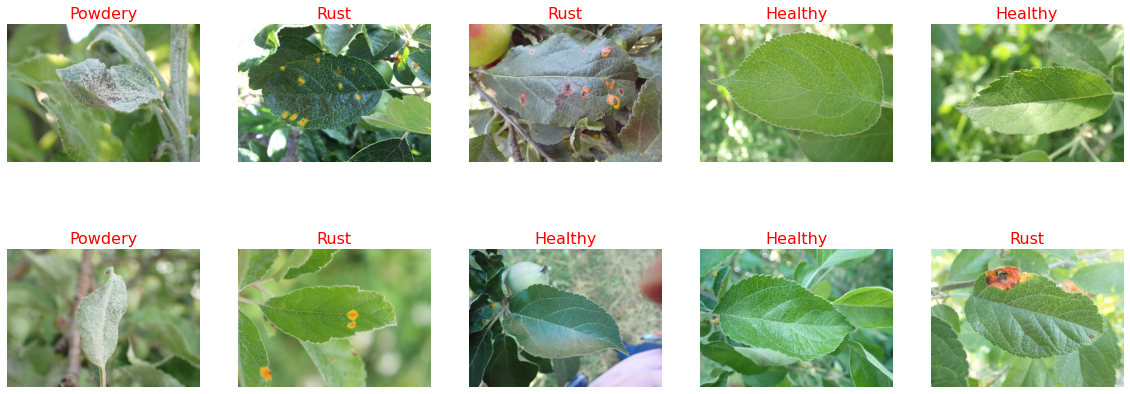

In [48]:
show_image_samples(train_gen)

# Calling Resnet50V2 Model-2

In [11]:
from tensorflow.keras.applications import ResNet50V2
resnet50v2 = tf.keras.applications.ResNet50V2(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
resnet50v2.trainable = False

94683136/94668760 [==============================] - 1s 0us/step


# Making Deep CNN ResNet50Model-2

In [12]:
model_input = resnet50v2.input
classifier = tf.keras.layers.Dense(128, activation='relu')(resnet50v2.output)
classifier = tf.keras.layers.Dense(64, activation='relu')(resnet50v2.output)
classifier = tf.keras.layers.Dense(512, activation='relu')(resnet50v2.output)
classifier = tf.keras.layers.Dense(128, activation='relu')(resnet50v2.output)
classifier = tf.keras.layers.Dense(256, activation='relu')(resnet50v2.output)
model_output = tf.keras.layers.Dense(3, activation='sigmoid')(classifier)
model2 = tf.keras.Model(inputs=model_input, outputs=model_output)

# Compiling with ADAM Optimizer and Binary Crossentropy Loss Function

In [13]:
model2.compile(optimizer='adam',loss ='categorical_crossentropy', metrics=['accuracy'])

# Fitting the Dataset into Model

In [18]:
history2=model2.fit(train_gen,batch_size=32 ,validation_data=(valid_gen),epochs=20)

Epoch 1/20
34/34 [==============================] - 728s 21s/step - loss: 0.2689 - accuracy: 0.8903 - val_loss: 0.1175 - val_accuracy: 0.9500
Epoch 2/20
34/34 [==============================] - 196s 6s/step - loss: 0.0800 - accuracy: 0.9796 - val_loss: 0.0785 - val_accuracy: 0.9667
Epoch 3/20
34/34 [==============================] - 194s 6s/step - loss: 0.0466 - accuracy: 0.9871 - val_loss: 0.0574 - val_accuracy: 0.9667
Epoch 4/20
34/34 [==============================] - 195s 6s/step - loss: 0.0355 - accuracy: 0.9917 - val_loss: 0.0663 - val_accuracy: 0.9667
Epoch 5/20
34/34 [==============================] - 193s 6s/step - loss: 0.0246 - accuracy: 0.9955 - val_loss: 0.0675 - val_accuracy: 0.9833
Epoch 6/20
34/34 [==============================] - 190s 6s/step - loss: 0.0162 - accuracy: 0.9977 - val_loss: 0.0821 - val_accuracy: 0.9833
Epoch 7/20
34/34 [==============================] - 192s 6s/step - loss: 0.0193 - accuracy: 0.9962 - val_loss: 0.0590 - val_accuracy: 0.9833
Epoch 8/20
3

# Prediction on Test Set

In [19]:
y_pred=model2.predict(test_gen)
y_pred=np.argmax(y_pred,axis=1)
labels = test_gen.labels
y_true = np.array(labels)

# Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
target_names = ['Healthy','Powdery','Rust']
cm = confusion_matrix(test_gen.classes,y_pred)
print(cm)

[[48  0  2]
 [ 4 46  0]
 [ 3  1 46]]


Text(114.0, 0.5, 'Predicted')

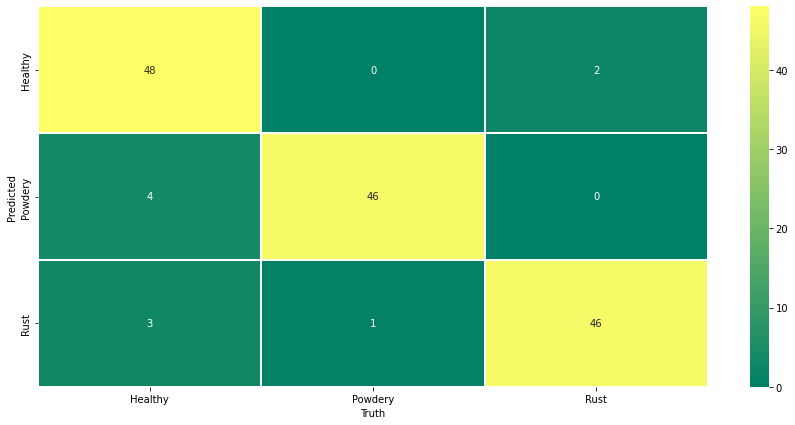

In [22]:
plt.subplots(figsize=(15,7))
sns.heatmap(cm, annot= True, linewidth=1, cmap="summer",xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

# Accuracy

In [23]:
print("Accuracy : ",accuracy_score(test_gen.classes,y_pred))

Accuracy :  0.9333333333333333


# Training vs Validation Accuracy Plot

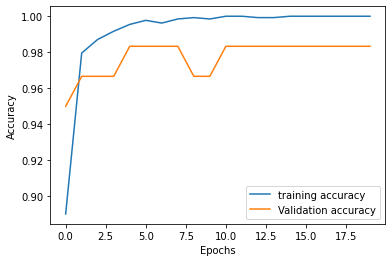

In [38]:
plt.plot(history2.history['accuracy'], label= 'training accuracy')
plt.plot(history2.history['val_accuracy'], label= 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc= 'lower right')
plt.show()

# Training Loss vs Validation Loss Plot

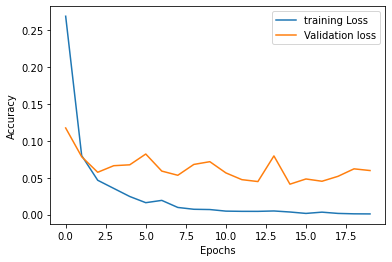

In [46]:
plt.plot(history2.history['loss'], label= 'training Loss')
plt.plot(history2.history['val_loss'], label= 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc= 'upper right')
plt.show()

# Classification Report

In [26]:
print(classification_report(test_gen.classes,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        50
           1       0.98      0.92      0.95        50
           2       0.96      0.92      0.94        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150



# Calling InceptionV3 Model-3

In [27]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
InceptionV3 = tf.keras.applications.InceptionV3(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
InceptionV3.trainable = False

87924736/87910968 [==============================] - 1s 0us/step


# Making Deep CNN InceptionV3Model-3

In [28]:
model_input = InceptionV3.input
classifier = tf.keras.layers.Dense(128, activation='relu')(InceptionV3.output)
classifier = tf.keras.layers.Dense(64, activation='relu')(InceptionV3.output)
classifier = tf.keras.layers.Dense(512, activation='relu')(InceptionV3.output)
classifier = tf.keras.layers.Dense(128, activation='relu')(InceptionV3.output)
classifier = tf.keras.layers.Dense(256, activation='relu')(InceptionV3.output)
model_output = tf.keras.layers.Dense(3, activation='sigmoid')(classifier)
model3 = tf.keras.Model(inputs=model_input, outputs=model_output)

# Compiling with ADAM Optimizer and Binary Crossentropy Loss Function

In [36]:
model3.compile(optimizer='adam',loss ='categorical_crossentropy', metrics=['accuracy'])

# Fitting the Dataset into Model

In [37]:
history3=model3.fit(train_gen ,batch_size=32,validation_data=valid_gen,epochs=20)

Epoch 1/20
34/34 [==============================] - 211s 6s/step - loss: 0.1632 - accuracy: 0.9433 - val_loss: 0.1271 - val_accuracy: 0.9333
Epoch 2/20
34/34 [==============================] - 198s 6s/step - loss: 0.0848 - accuracy: 0.9705 - val_loss: 0.1543 - val_accuracy: 0.9500
Epoch 3/20
34/34 [==============================] - 195s 6s/step - loss: 0.0549 - accuracy: 0.9811 - val_loss: 0.0659 - val_accuracy: 0.9667
Epoch 4/20
34/34 [==============================] - 196s 6s/step - loss: 0.0593 - accuracy: 0.9796 - val_loss: 0.0896 - val_accuracy: 0.9500
Epoch 5/20
34/34 [==============================] - 195s 6s/step - loss: 0.0492 - accuracy: 0.9796 - val_loss: 0.1021 - val_accuracy: 0.9500
Epoch 6/20
34/34 [==============================] - 196s 6s/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0899 - val_accuracy: 0.9833
Epoch 7/20
34/34 [==============================] - 193s 6s/step - loss: 0.0516 - accuracy: 0.9811 - val_loss: 0.1208 - val_accuracy: 0.9667
Epoch 8/20
34

# Prediction on Test Set

In [39]:
y_pred=model3.predict(test_gen)
y_pred=np.argmax(y_pred,axis=1)
labels = test_gen.labels
y_true = np.array(labels)

# Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
target_names = ['Healthy','Powdery','Rust']
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[49  0  1]
 [ 5 45  0]
 [ 0  0 50]]


Text(114.0, 0.5, 'Predicted')

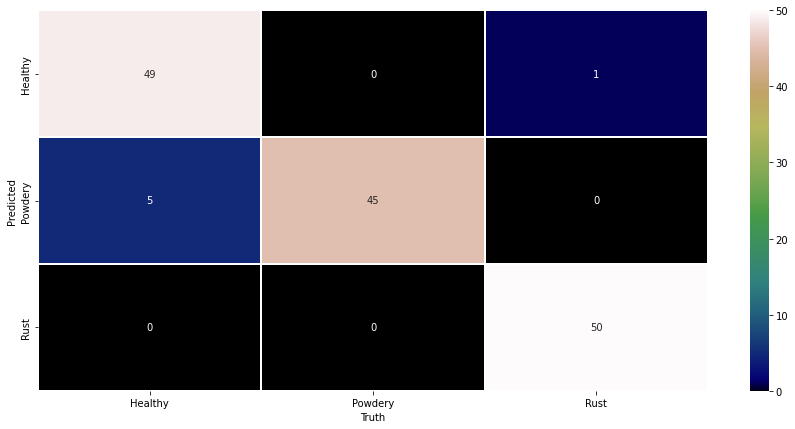

In [41]:
plt.subplots(figsize=(15,7))
sns.heatmap(cm, annot= True, linewidth=1, cmap="gist_earth",
            xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

# Accuracy

In [42]:
print("Accuracy : ",accuracy_score(test_gen.classes,y_pred))

Accuracy :  0.96


# Training vs Validation Accuracy Plot

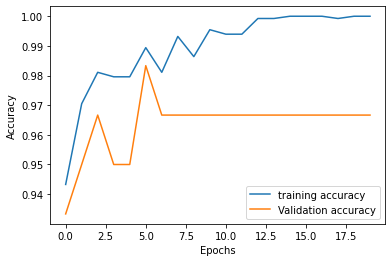

In [43]:
plt.plot(history3.history['accuracy'], label= 'training accuracy')
plt.plot(history3.history['val_accuracy'], label= 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc= 'lower right')
plt.show()

# Training Loss vs Validation Loss Plot

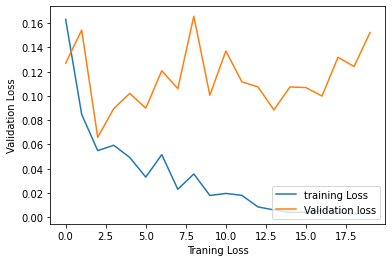

In [44]:
plt.plot(history3.history['loss'], label= 'training Loss')
plt.plot(history3.history['val_loss'], label= 'Validation loss')
plt.xlabel('Traning Loss')
plt.ylabel('Validation Loss')
plt.legend(loc= 'lower right')
plt.show()

# Classification Report

In [45]:
print(classification_report(test_gen.classes,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        50
           1       1.00      0.90      0.95        50
           2       0.98      1.00      0.99        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

